# Import things

In [1]:
import pca # explain, apply, visualize
import decision_tree # DecisionTree
import adapter # Adapter
import pandas

# Open dataset

In [2]:
dataset = pandas.read_csv("dataset.csv")

# Explain with PCA

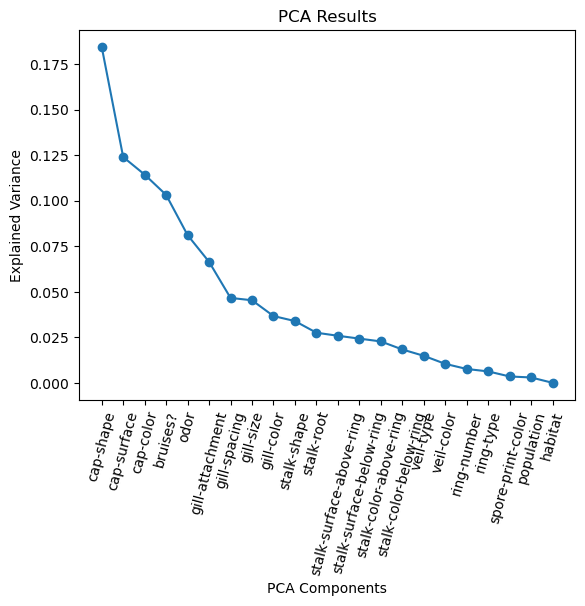

In [3]:
scaled_data = adapter.Adapter(dataset).skip(["class"]).with_categoricals().only_numericals().scale().ok()
pca.explain(scaled_data)

# Select PCA Components

In [4]:
components, data, explained_variance, most_important_features = pca.apply(scaled_data)
print("explained variance = %s%%" % (explained_variance.round(3) * 100))
print("number of selected features = %s" % len(most_important_features))
print("most important features = %s" % most_important_features)

explained variance = 83.6%
number of selected features = 9
most important features = ['habitat', 'ring-number', 'cap-shape', 'stalk-surface-below-ring', 'gill-attachment', 'stalk-color-above-ring', 'ring-type', 'stalk-surface-above-ring', 'cap-surface']


# Visualize PCA Components

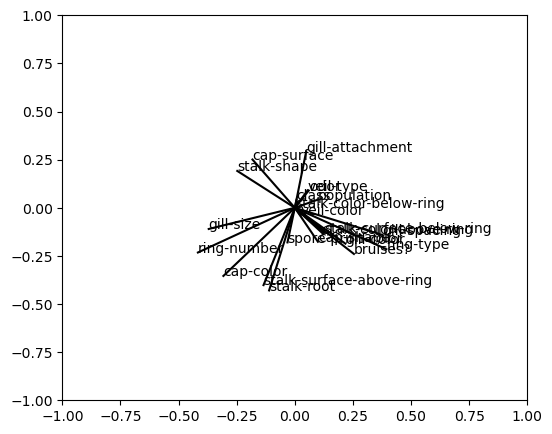

In [5]:
pca.visualize(components, dataset)

# Using a Decision Tree on all Dataset

In [6]:
trainset, testset = adapter.Adapter(dataset).split('class')
tree = decision_tree.DecisionTree(trainset)
cm, acc = tree.evaluate(testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 100.0


# Selecting features with PCA

In [8]:
trainset, testset = adapter.Adapter(dataset).only(most_important_features + ['class']).split('class')
tree = decision_tree.DecisionTree(trainset)
cm, acc = tree.evaluate(testset)
print("accuracy = %s" % (acc.round(3) * 100))

accuracy = 96.8
